In [153]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

/home/stardust/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [113]:
data = pd.read_csv("Data/train.csv")
data.head(10)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [114]:
negative = data.groupby("WnvPresent").count()['Date'][0]
positive = data.groupby("WnvPresent").count()['Date'][1]
print 'Positive: ' + str(positive) + "(" + str(float(positive) / (positive + negative) * 100) + "%)"
print 'Negative: ' + str(negative) + "(" + str(float(negative) / (positive + negative) * 100) + "%)"

Positive: 551(5.24462212069%)
Negative: 9955(94.7553778793%)


In [115]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [116]:
describe_categorical(data)

,Date,Address,Species,Street,Trap,AddressNumberAndStreet
count,10506,10506,10506,10506,10506,10506
unique,95,138,7,128,136,138
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL"
freq,551,750,4752,750,750,750


In [117]:
data.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [118]:
data.drop(['Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet'], axis=1, inplace=True)

In [119]:
data.head(10)

,Date,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,9,1,0
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,9,1,0
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,9,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,8,1,0
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,8,4,0
5,2007-05-29,CULEX RESTUANS,41.921600,-87.666455,8,2,0
6,2007-05-29,CULEX RESTUANS,41.891118,-87.654491,8,1,0
7,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,8,1,0
8,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,8,2,0
9,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,8,1,0


In [120]:
weather = pd.read_csv('Data/weather.csv')
weather.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [121]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [122]:
describe_categorical(weather)

,Date,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
count,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944
unique,1472,60,42,48,31,31,122,119,98,2,1,4,168,104,102,178
top,2013-06-02,73,M,63,0,0,-,-,,M,M,M,0.00,29.34,30.00,6.9
freq,2,138,1472,135,1870,1147,1472,1472,1609,1472,2944,1472,1577,128,96,63


In [123]:
fillna_table = weather.copy()
fillna_table.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [124]:
fillna_table['Tavg'] = (fillna_table['Tmax'] + fillna_table['Tmin']) / 2
fillna_table.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,66.5,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,50.5,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,51.5,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,57.5,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,57.5,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,64.5,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,59.5,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60.0,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [125]:
fillna_table = fillna_table[['Date', 'Station', 'Tavg']]
fillna_table.head(10)

,Date,Station,Tavg
0,2007-05-01,1,66.5
1,2007-05-01,2,68.0
2,2007-05-02,1,50.5
3,2007-05-02,2,51.5
4,2007-05-03,1,56.0
5,2007-05-03,2,57.5
6,2007-05-04,1,57.5
7,2007-05-04,2,64.5
8,2007-05-05,1,59.5
9,2007-05-05,2,60.0


In [126]:
weather = weather[['Date', 'Station', 'Tavg', 'Tmin', 'Tmax']]
weather.head(10)

,Date,Station,Tavg,Tmin,Tmax
0,2007-05-01,1,67,50,83
1,2007-05-01,2,68,52,84
2,2007-05-02,1,51,42,59
3,2007-05-02,2,52,43,60
4,2007-05-03,1,56,46,66
5,2007-05-03,2,58,48,67
6,2007-05-04,1,58,49,66
7,2007-05-04,2,M,51,78
8,2007-05-05,1,60,53,66
9,2007-05-05,2,60,54,66


In [127]:
weather = weather.merge(fillna_table, left_on=['Date', 'Station'], right_on=['Date', 'Station'])
weather.head(10)

,Date,Station,Tavg_x,Tmin,Tmax,Tavg_y
0,2007-05-01,1,67,50,83,66.5
1,2007-05-01,2,68,52,84,68.0
2,2007-05-02,1,51,42,59,50.5
3,2007-05-02,2,52,43,60,51.5
4,2007-05-03,1,56,46,66,56.0
5,2007-05-03,2,58,48,67,57.5
6,2007-05-04,1,58,49,66,57.5
7,2007-05-04,2,M,51,78,64.5
8,2007-05-05,1,60,53,66,59.5
9,2007-05-05,2,60,54,66,60.0


In [128]:
mask = (weather['Tavg_x'] == 'M')
weather.loc[mask,'Tavg_x'] = weather['Tavg_y']
weather.head(10)

,Date,Station,Tavg_x,Tmin,Tmax,Tavg_y
0,2007-05-01,1,67,50,83,66.5
1,2007-05-01,2,68,52,84,68.0
2,2007-05-02,1,51,42,59,50.5
3,2007-05-02,2,52,43,60,51.5
4,2007-05-03,1,56,46,66,56.0
5,2007-05-03,2,58,48,67,57.5
6,2007-05-04,1,58,49,66,57.5
7,2007-05-04,2,64.5,51,78,64.5
8,2007-05-05,1,60,53,66,59.5
9,2007-05-05,2,60,54,66,60.0


In [129]:
weather.drop('Tavg_y', axis=1, inplace=True)

In [130]:
station1 = weather[weather['Station'] == 1]
station2 = weather[weather['Station'] == 2]

In [131]:
station1.head(5)

,Date,Station,Tavg_x,Tmin,Tmax
0,2007-05-01,1,67,50,83
2,2007-05-02,1,51,42,59
4,2007-05-03,1,56,46,66
6,2007-05-04,1,58,49,66
8,2007-05-05,1,60,53,66


In [132]:
station2.head(5)

,Date,Station,Tavg_x,Tmin,Tmax
1,2007-05-01,2,68,52,84
3,2007-05-02,2,52,43,60
5,2007-05-03,2,58,48,67
7,2007-05-04,2,64.5,51,78
9,2007-05-05,2,60,54,66


In [133]:
weather_final = station1.merge(station2, left_on='Date', right_on='Date')
weather_final.head(10)

,Date,Station_x,Tavg_x_x,Tmin_x,Tmax_x,Station_y,Tavg_x_y,Tmin_y,Tmax_y
0,2007-05-01,1,67,50,83,2,68,52,84
1,2007-05-02,1,51,42,59,2,52,43,60
2,2007-05-03,1,56,46,66,2,58,48,67
3,2007-05-04,1,58,49,66,2,64.5,51,78
4,2007-05-05,1,60,53,66,2,60,54,66
5,2007-05-06,1,59,49,68,2,60,52,68
6,2007-05-07,1,65,47,83,2,67,50,84
7,2007-05-08,1,68,54,82,2,70,60,80
8,2007-05-09,1,69,61,77,2,70,63,76
9,2007-05-10,1,70,56,84,2,71,59,83


In [134]:
data = data.merge(weather_final, left_on='Date', right_on='Date')
data.head(10)

,Date,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station_x,Tavg_x_x,Tmin_x,Tmax_x,Station_y,Tavg_x_y,Tmin_y,Tmax_y
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,9,1,0,1,74,60,88,2,77,65,88
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,9,1,0,1,74,60,88,2,77,65,88
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,9,1,0,1,74,60,88,2,77,65,88
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,8,1,0,1,74,60,88,2,77,65,88
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,8,4,0,1,74,60,88,2,77,65,88
5,2007-05-29,CULEX RESTUANS,41.921600,-87.666455,8,2,0,1,74,60,88,2,77,65,88
6,2007-05-29,CULEX RESTUANS,41.891118,-87.654491,8,1,0,1,74,60,88,2,77,65,88
7,2007-05-29,CULEX PIPIENS/RESTUANS,41.867108,-87.654224,8,1,0,1,74,60,88,2,77,65,88
8,2007-05-29,CULEX RESTUANS,41.867108,-87.654224,8,2,0,1,74,60,88,2,77,65,88
9,2007-05-29,CULEX RESTUANS,41.896282,-87.655232,8,1,0,1,74,60,88,2,77,65,88


In [135]:
data['Latitude'] = data['Latitude'].apply(int)
data['Longitude'] = data['Longitude'].apply(int)
data.head(10)

,Date,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station_x,Tavg_x_x,Tmin_x,Tmax_x,Station_y,Tavg_x_y,Tmin_y,Tmax_y
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,-87,9,1,0,1,74,60,88,2,77,65,88
1,2007-05-29,CULEX RESTUANS,41,-87,9,1,0,1,74,60,88,2,77,65,88
2,2007-05-29,CULEX RESTUANS,41,-87,9,1,0,1,74,60,88,2,77,65,88
3,2007-05-29,CULEX PIPIENS/RESTUANS,41,-87,8,1,0,1,74,60,88,2,77,65,88
4,2007-05-29,CULEX RESTUANS,41,-87,8,4,0,1,74,60,88,2,77,65,88
5,2007-05-29,CULEX RESTUANS,41,-87,8,2,0,1,74,60,88,2,77,65,88
6,2007-05-29,CULEX RESTUANS,41,-87,8,1,0,1,74,60,88,2,77,65,88
7,2007-05-29,CULEX PIPIENS/RESTUANS,41,-87,8,1,0,1,74,60,88,2,77,65,88
8,2007-05-29,CULEX RESTUANS,41,-87,8,2,0,1,74,60,88,2,77,65,88
9,2007-05-29,CULEX RESTUANS,41,-87,8,1,0,1,74,60,88,2,77,65,88


In [136]:
data.drop("Date", axis=1, inplace=True)

In [137]:
data['Species'] = pd.factorize(data['Species'])[0]
data.head(10)

,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station_x,Tavg_x_x,Tmin_x,Tmax_x,Station_y,Tavg_x_y,Tmin_y,Tmax_y
0,0,41,-87,9,1,0,1,74,60,88,2,77,65,88
1,1,41,-87,9,1,0,1,74,60,88,2,77,65,88
2,1,41,-87,9,1,0,1,74,60,88,2,77,65,88
3,0,41,-87,8,1,0,1,74,60,88,2,77,65,88
4,1,41,-87,8,4,0,1,74,60,88,2,77,65,88
5,1,41,-87,8,2,0,1,74,60,88,2,77,65,88
6,1,41,-87,8,1,0,1,74,60,88,2,77,65,88
7,0,41,-87,8,1,0,1,74,60,88,2,77,65,88
8,1,41,-87,8,2,0,1,74,60,88,2,77,65,88
9,1,41,-87,8,1,0,1,74,60,88,2,77,65,88


In [138]:
data.describe()

,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station_x,Tmin_x,Tmax_x,Station_y,Tmin_y,Tmax_y
count,10506.000000,10506.000000,10506.0,10506.000000,10506.000000,10506.000000,10506.0,10506.000000,10506.000000,10506.0,10506.000000,10506.000000
mean,0.887112,41.038930,-87.0,7.819532,12.853512,0.052446,1.0,62.716067,81.847992,2.0,64.578336,81.986198
std,0.964881,0.193438,0.0,1.452921,16.133816,0.222936,0.0,7.677123,8.278380,0.0,7.393863,8.301924
min,0.000000,41.000000,-87.0,3.000000,1.000000,0.000000,1.0,41.000000,57.000000,2.0,44.000000,58.000000
25%,0.000000,41.000000,-87.0,8.000000,2.000000,0.000000,1.0,58.000000,78.000000,2.0,60.000000,78.000000
50%,1.000000,41.000000,-87.0,8.000000,5.000000,0.000000,1.0,64.000000,83.000000,2.0,67.000000,83.000000
75%,2.000000,41.000000,-87.0,9.000000,17.000000,0.000000,1.0,69.000000,88.000000,2.0,70.000000,87.000000
max,6.000000,42.000000,-87.0,9.000000,50.000000,1.000000,1.0,76.000000,96.000000,2.0,79.000000,97.000000


In [139]:
x = data.drop("WnvPresent", axis=1)
y = data['WnvPresent']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [140]:
neg = y_test.value_counts()[0]
pos = y_test.value_counts()[1]
print "Test Negative: " + str(neg) + "(" + str(float(neg)/(pos + neg) * 100) + "%)"
print "Test Positive: " + str(pos) + "(" + str(float(pos)/(pos + neg) * 100) + "%)"

Test Negative: 3285(94.7505047592%)
Test Positive: 182(5.24949524084%)


In [141]:
clf = tree.DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)
print("Accuracy Score: " + str(dt.score(x_test, y_test)))

Accuracy Score: 0.924430343236


In [142]:
support = pd.DataFrame({"real": y_test, "predict": clf.predict(x_test)})
support.head(10)

,predict,real
33,0,0
9632,1,0
5009,0,1
4404,0,0
4626,0,0
6095,0,0
10357,0,0
518,0,0
5790,0,0
9284,0,0


In [143]:
support['correct'] = support['predict'] == support['real']
support['correct'] = support['correct'].apply(int)
support.head(10)

,predict,real,correct
33,0,0,1
9632,1,0,0
5009,0,1,0
4404,0,0,1
4626,0,0,1
6095,0,0,1
10357,0,0,1
518,0,0,1
5790,0,0,1
9284,0,0,1


In [151]:
n = support.count()[0]
c = support['correct'].sum()
print "Acc : " + str(float(c) / n * 100) + "%"

pneg = support.groupby('real').sum()['correct'][0]
ppos = support.groupby('real').sum()['correct'][1]

print ""
print "Test Support"
print "------------"

print "Test Negative: " + str(neg) + "(" + str(float(neg)/(pos + neg) * 100) + "%)"
print "Test Positive: " + str(pos) + "(" + str(float(pos)/(pos + neg) * 100) + "%)"

print ""
print "Test Confidence"
print "---------------"

print "Negative Accuracy: " + str(float(pneg) / neg * 100) + "%"
print "Positive Accuracy: " + str(float(ppos) / pos * 100) + "%"

Acc : 92.4430343236%

Test Support
------------
Test Negative: 3285(94.7505047592%)
Test Positive: 182(5.24949524084%)

Test Confidence
---------------
Negative Accuracy: 96.8340943683%
Positive Accuracy: 13.1868131868%


In [154]:
cv = cross_val_score(dt, x, y, cv=10)
cv

array([ 0.92870722,  0.39771646,  0.37963844,  0.89628925,  0.94100856,
        0.61333333,  0.81047619,  0.6552381 ,  0.58190476,  0.46095238])

<IPython.core.display.Javascript object>


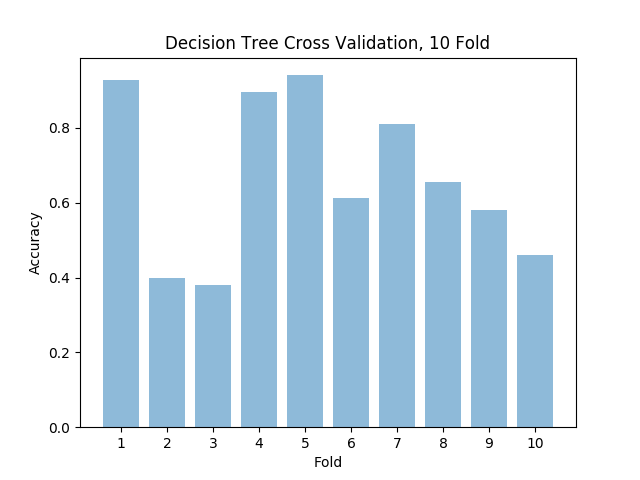

In [155]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = cv
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Decision Tree Cross Validation, 10 Fold')
 
plt.show()

In [157]:
print("Mean: " + str(cv.mean()))
print("Standard Deviation: " + str(cv.std()))

Mean: 0.666526469794
Standard Deviation: 0.206042147087
